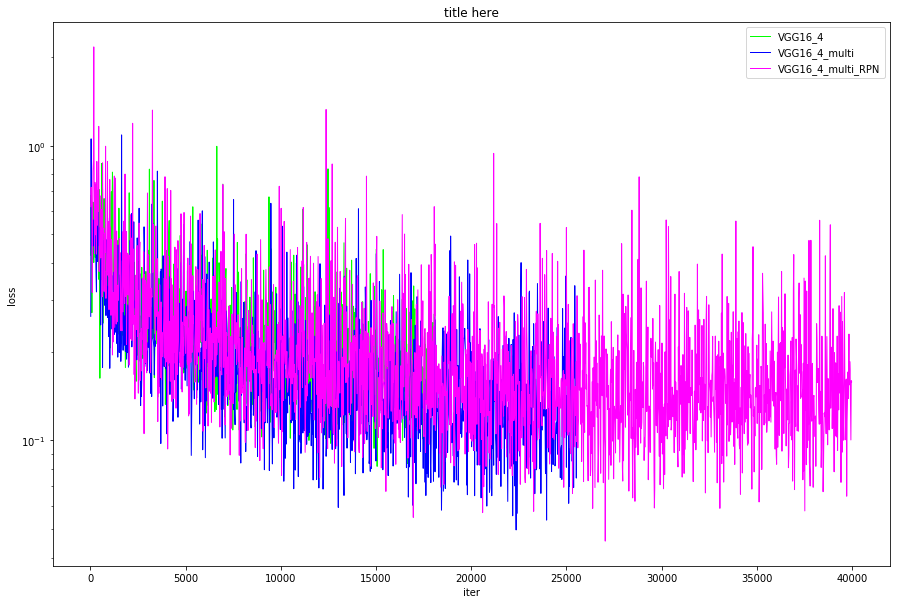

In [8]:
# python parse_log.py ??? ./
import matplotlib.pyplot as plt
import random 
import numpy as np

def load_data(data_file, field_idx):
    data = [[] for _ in range(len(field_idx))]
    with open(data_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line[0].isdigit():
                fields = line.split(',')
                for item in range(len(field_idx)):
                    data[item].append(float(fields[field_idx[item]].strip()))
    return data

color = [[1,0,0], [0,1,0], [0,0,1], [1,0,1]]
label = ['VGG16_3', 'VGG16_4', 'VGG16_4_multi', 'VGG16_4_multi_RPN']

plt.figure()
plt.rcParams["figure.figsize"] = [15,10]
plt.title('title here')
plt.xlabel('iter')
plt.ylabel('loss')
plt.yscale('log')



path_to_log_list = ['express_train_VGG16_3_.txt.2019-02-21_10-26-44.train',
                   'express_train_VGG16_4_.txt.2019-02-21_14-01-22.train',
                   'express_train_VGG16_4_multi_.txt.2019-02-21_16-22-38.train',
                   'express_train_VGG16_4_multi_RPN_.txt.2019-02-21_20-23-24.train']

path_to_log_list = ['/home/sheng/code/express/temp/'+item for item in path_to_log_list]
for i in [1,2,3]:
    data = load_data(path_to_log_list[i], [0,3,4,5,6])
    data = np.array(data)
    data = np.vstack((data[0], np.sum(data[1:,:], axis=0)))
    plt.plot(data[0], data[1], label = label[i], color = color[i], linewidth = 1)

plt.legend(loc='upper right')
plt.show()

370387721817_20170509211547_y.jpg
bbox [[559 366 782 484]
 [541 761 770 864]]
label [array([1, 5, 5, 1, 5, 9, 3, 1, 7, 0, 5]), array([0, 9, 8, 3, 9, 2, 3, 3, 3, 7])]


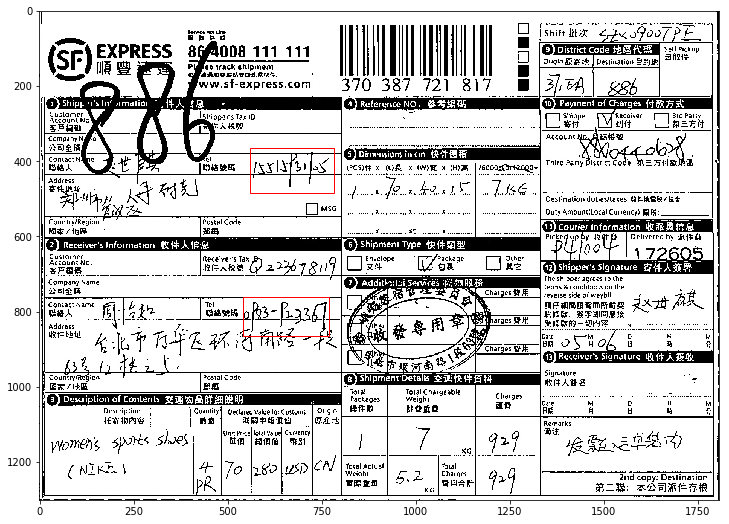

In [4]:
## train gt_roidb
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

with open('./data/express/namelist_express.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/express_train_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
    
index = 3
im = np.array(Image.open(os.path.join('data/express/dataset/',gt_roidb[index]['image'])))
print namelist[index]
fig, ax = plt.subplots(1)
ax.imshow(im)
# plt.figure(figsize=(100,100))
plt.rcParams["figure.figsize"] = [16,9]

bbox = gt_roidb[index]['boxes']
label = gt_roidb[index]['label']
print 'bbox', bbox
print 'label', label

for item in bbox:
    x1,y1,x2,y2 = item
    ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [16]:
## test gt_roidb
## test det
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

with open('./data/express/namelist_express.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/express_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
with open('output/express_train/VGG16_4_multi_RPN/detections_25000.pkl', 'rb') as fid:
    det = cPickle.load(fid)

In [17]:
len(gt_roidb)

1709

664711457165_20170509215327_y.jpg
bbox [[204 323 407 395]
 [209 571 492 640]]


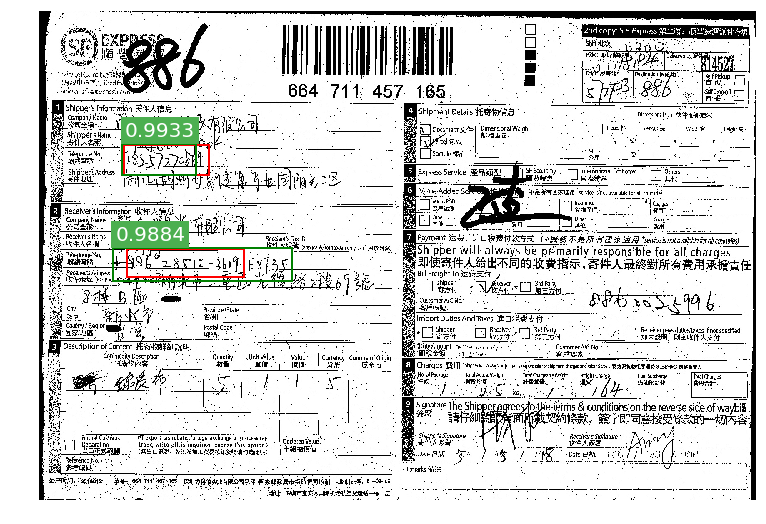

In [37]:
index = 17
im = np.array(Image.open(os.path.join('data/express/dataset/',gt_roidb[index]['image'])))
print gt_roidb[index]['image']
fig, ax = plt.subplots(1)
ax.imshow(im)
# plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.axis('off')

bbox = gt_roidb[index]['boxes']
print 'bbox', bbox
label = gt_roidb[index]['label']
for item in bbox:
    x1,y1,x2,y2 = item
    ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=2,edgecolor='r',facecolor='none'))
    
pred = det[1][index]
for item in pred[:2]:
    x1,y1,x2,y2,score = item
    ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=2,edgecolor='g',facecolor='none'))
    ax.text(x1 + 5, y1 - 18, '{:.4f}'.format(score),
                    bbox=dict(facecolor='#4CAF50', linewidth=0),
                    fontsize=20, color='white')
    
plt.show()

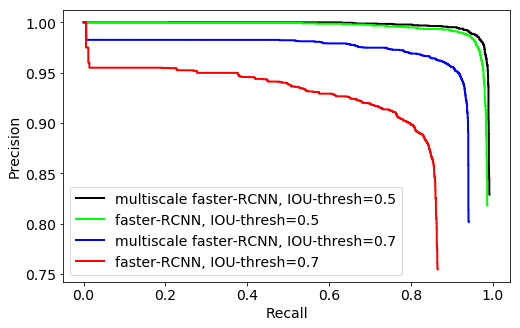

In [10]:
import matplotlib
import cPickle
from matplotlib import pyplot as plt

with open('output/express_test/evaluation.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'multiscale faster-RCNN, IOU-thresh=0.5', color = [0,0,0], linewidth = 2)

with open('output/express_test/evaluation_0.5.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'faster-RCNN, IOU-thresh=0.5', color = [0,1,0], linewidth = 2)

with open('output/express_test/evaluation_multi_0.7.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'multiscale faster-RCNN, IOU-thresh=0.7', color = [0,0,1], linewidth = 2)

with open('output/express_test/evaluation_0.7.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'faster-RCNN, IOU-thresh=0.7', color = [1,0,0], linewidth = 2)

# plt.title('title here')
plt.rcParams["figure.figsize"] = [8,5]
matplotlib.rcParams.update({'font.size': 14})
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.show()

[1.         1.         1.         ... 0.75465918 0.75446656 0.75452922]
[0.00000000e+00 2.92568754e-04 5.85137507e-04 ... 8.64833236e-01
 8.64833236e-01 8.65125805e-01]
[1.         1.         1.         ... 0.75465918 0.75452922 0.75452922]


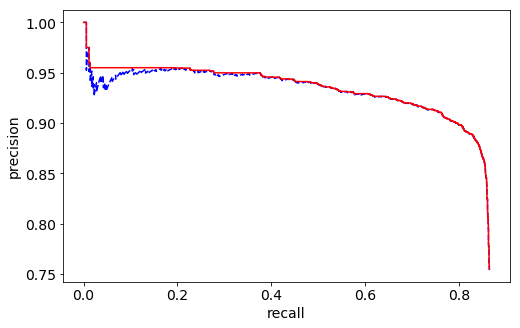

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#just a dummy sample
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
print precision
print recall
print decreasing_max_precision

fig, ax = plt.subplots()
ax.plot(recall, precision, '--b')
ax.step(recall, decreasing_max_precision, '-r')
ax.set_xlabel("recall")
ax.set_ylabel("precision")
plt.savefig('fig.jpg')
fig.show()

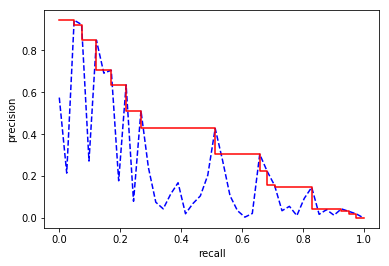

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#just a dummy sample
recall=np.linspace(0.0,1.0,num=42)
precision=np.random.rand(42)*(1.-recall)
precision2=precision.copy()
i=recall.shape[0]-2

decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]

fig, ax = plt.subplots()
ax.plot(recall, precision, '--b')
ax.step(recall, decreasing_max_precision, '-r')
ax.set_xlabel("recall")
ax.set_ylabel("precision")
plt.savefig('fig.jpg')
fig.show()